In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, classification_report

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Description of features
**Encounter ID**	(Numeric)	 Unique identifier of an encounter

**Patient number**	(Numeric)	 Unique identifier of a patient

**Race**	(Nominal)	Values:  Caucasian, Asian, African American, Hispanic, and other

**Gender**	(Nominal)	Values:  male, female, and unknown/invalid

**Age**	            (Nominal) Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight**	        (Numeric) Weight in pounds.

**Admission type**	(Nominal) Integer identifier corresponding to 9 distinct values, for example,                            emergency, urgent, elective, newborn, and not available

**Discharge disposition**	(Nominal)	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source** (Nominal) Integer identifier corresponding to 21 distinct values, for example,                           physician referral, emergency room, and transfer from a hospital

**Time in hospital** (Numeric) Integer number of days between admission and discharge

**Payer code**	(Nominal)	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay

**Medical specialty**	(Nominal)	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures**	(Numeric)	Number of lab tests performed during the encounter

**Number of procedures**	(Numeric)	Number of procedures (other than lab tests) performed during the encounter

**Number of medications**	(Numeric)	Number of distinct generic names administered during the encounter

**Number of outpatient visits**	(Numeric)	Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits**	(Numeric)	Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits**	(Numeric)	Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1**	(Nominal)	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2**	(Nominal)	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3**	(Nominal)	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses**	(Numeric)	Number of diagnoses entered to the system

**Glucose serum test result**	(Nominal)	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c test result**	(Nominal)	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications**	(Nominal)	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications**	(Nominal)	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

**24 features for medications**	(Nominal)	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted**	(Nominal)	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.


### Missing Values Treatment

In [9]:
df["weight"].replace("?", np.nan, inplace=True)

In [10]:
df["payer_code"].replace("?", np.nan, inplace=True)

In [11]:
df["medical_specialty"].replace("?", np.nan, inplace=True)

In [12]:
df["diag_1"].replace("?", np.nan, inplace=True)
df["diag_2"].replace("?", np.nan, inplace=True)
df["diag_3"].replace("?", np.nan, inplace=True)

In [13]:
cols = list(df.columns)
for col in cols:
    df[col].replace("?", np.nan, inplace=True)

In [14]:
(df.isnull().sum()/len(df))*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [15]:
len(df)

101766

### Race Variable

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


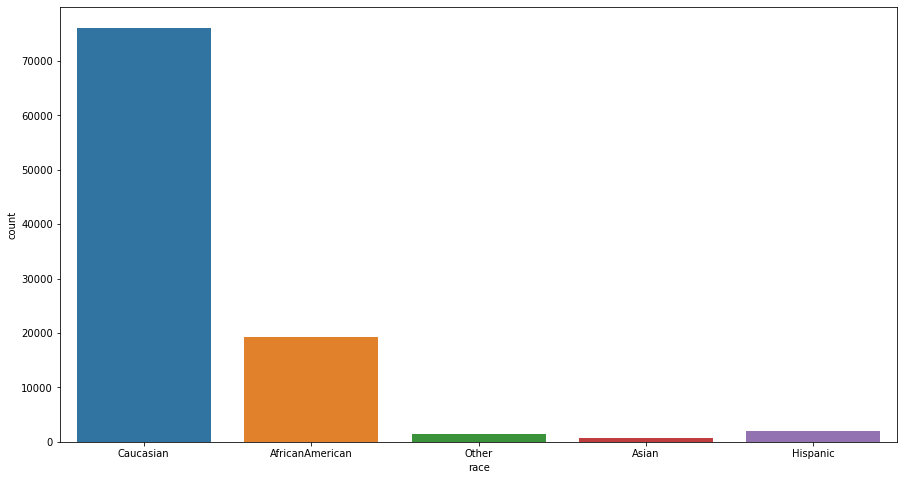

In [16]:
plt.figure(figsize = (15,8))
sns.countplot(df["race"])
plt.show()

In [17]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [18]:
df["race"].fillna("Other", inplace=True)

In [19]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

### Duplicates in patient_nbr

In [20]:
df.drop_duplicates(subset = ["patient_nbr"], keep = "first", inplace=True, ignore_index=True)

In [21]:
len(df)

71518

### Diag_1, Diag_2, Diag_3

In [22]:
df.dropna(subset = ["diag_1", "diag_2", "diag_3"], axis=0, how = "any", inplace=True)

In [23]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      67403
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  30327
medical_specialty           34104
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [24]:
len(df)

70233

#### Gender

In [25]:
df["gender"].value_counts()

Female             37383
Male               32847
Unknown/Invalid        3
Name: gender, dtype: int64

In [26]:
#Dropping 3 invalid gender data points

In [27]:
df[df["gender"] == "Unknown/Invalid"]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
22926,98634858,100695042,Other,Unknown/Invalid,[70-80),NaN,3,1,1,1,NaN,Cardiology,5,5,22,0,0,0,414,411,401,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
55129,226864668,60524946,Other,Unknown/Invalid,[60-70),NaN,1,1,7,1,CP,NaN,38,1,6,0,0,0,808,873,E813,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
59490,257364294,78119847,Other,Unknown/Invalid,[70-80),NaN,1,22,7,8,CP,NaN,59,2,21,0,0,0,850,805,808,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


In [28]:
df.loc[[22926, 55129, 59490]]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
22926,98634858,100695042,Other,Unknown/Invalid,[70-80),NaN,3,1,1,1,NaN,Cardiology,5,5,22,0,0,0,414,411,401,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
55129,226864668,60524946,Other,Unknown/Invalid,[60-70),NaN,1,1,7,1,CP,NaN,38,1,6,0,0,0,808,873,E813,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
59490,257364294,78119847,Other,Unknown/Invalid,[70-80),NaN,1,22,7,8,CP,NaN,59,2,21,0,0,0,850,805,808,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


In [29]:
df.drop(index = [22926, 55129, 59490], inplace=True)

In [30]:
df["gender"].value_counts()

Female    37383
Male      32847
Name: gender, dtype: int64

### Weight

In [31]:
df.drop("weight", axis=1, inplace=True)

In [32]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


### Payer_code

In [33]:
df.drop("payer_code", axis=1, inplace=True )

In [34]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


### Medical_specialty

In [35]:
df.drop("medical_specialty", axis=1, inplace=True)

In [36]:
(df.isnull().sum()/len(df))*100

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglit

In [37]:
#We have completed the missing value treatment and the final shape of the dataset is:

In [38]:
df.shape

(70230, 47)

In [39]:
####Adjusting age column properly and will replace age bucket with an integer i.e. mid value of the age group later

In [40]:
df['age'].value_counts()

[70-80)     18068
[60-70)     15797
[50-60)     12280
[80-90)     11507
[40-50)      6685
[30-40)      2570
[90-100)     1895
[20-30)      1021
[10-20)       343
[0-10)         64
Name: age, dtype: int64

In [41]:
df['age'] = df['age'].map({'[0-10)': 5,
           '[10-20)': 15,
           '[20-30)': 25,
           '[30-40)': 35,
           '[40-50)': 45,
           '[50-60)': 55,
           '[60-70)': 65,
           '[70-80)': 75,
           '[80-90)': 85,
           '[90-100)': 95
          })

In [42]:
#### From ICD-9-CM codes, we can replace the numbers in columns diag_1, diag_2, diag_3 with their respective diagnosis name

In [43]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


### Feature Engineering

In [44]:
#### Modifying the readmitted column to class 0 or 1 based on the readmission

In [45]:
df['readmitted'].replace('NO', "No", inplace = True)

df['readmitted'].replace(['>30','<30'], "Yes", inplace = True)

In [46]:
df['readmitted'].value_counts()

No     42041
Yes    28189
Name: readmitted, dtype: int64

In [47]:
df['insulin'].value_counts()

No        34410
Steady    21636
Down       7355
Up         6829
Name: insulin, dtype: int64

In [48]:
df.loc[(df['insulin'] == 'Steady') | (df['insulin'] == 'Down') | (df['insulin'] == 'Up'), 'insulin'] = 'Yes'

In [49]:
df['insulin'].value_counts()

Yes    35820
No     34410
Name: insulin, dtype: int64

In [50]:
df['diabetesMed'].value_counts()

Yes    53305
No     16925
Name: diabetesMed, dtype: int64

### Diag_1, Diag_2, Diag_3

#### We have taken into consideration the code range for various diagnosis from icd9cm codes

In [51]:
def cat_ICD9(x):
    if 'V' in str(x):
        return 'Supplementary Classification of External Causes of Injury and Poisoning'
    elif "E" in str(x):
        return 'Supplementary Classification of Factors influencing Health Status and Contact with Health Services'
    elif float(x) >= 0 and float(x) <= 139:
        return "Infectious and Parasitic Diseases"
    elif float(x) >=140 and float(x)<= 239:
        return 'Neoplasms'
    elif (float(x) >= 240 and float(x)< 250) or (float(x) >= 251 and float(x)<= 279) :
        return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
    elif float(x) >=250 and float(x) < 251:
        return 'Diabetes Mellitus'
    elif float(x) >=280 and float(x)<=289:
        return 'Diseases of the Blood and Blood-forming Organs'
    elif float(x) >=290 and float(x)<=319:
        return 'Mental Disorders'
    elif float(x) >=320 and float(x)<=389:
        return 'Diseases of the Nervous System and Sense Organs'
    elif (float(x) >= 390 and float(x)<= 459) or (float(x) == 785):
        return 'Diseases of the Circulatory System'
    elif (float(x) >=460 and float(x)<= 519)  or (float(x) == 786):
        return 'Diseases of the Respiratory System'
    elif (float(x) >= 520 and float(x)<= 579) or (float(x) == 787):
        return 'Diseases of the Digestive System'
    elif (float(x) >=580 and float(x)<= 629) or (float(x) == 788):
        return 'Diseases of the Genitourinary System'
    elif float(x) >= 630 and float(x)<= 679:
        return 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif (float(x) >= 680 and float(x)<= 709) or (float(x) == 782):
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif float(x)>=710 and float(x)<= 739:
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif float(x) >=740 and float(x)<=759:
        return 'Congenital Anomalies'
    elif float(x) >=760 and float(x)<=779:
        return 'Certain Conditions originating in the Perinatal Period'
    elif (float(x) >=790 and float(x)<= 799) or (float(x) == 780) or (float(x) == 781) or (float(x) == 784):
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif float(x)>=800 and float(x)<= 999:
        return 'Injury and Poisoning'
    else:
        return 'Others'

In [52]:
#Applying the categories to diag_1, 2, 3

In [53]:
diag_1_list = list(df['diag_1'])
diag_2_list = list(df['diag_2'])
diag_3_list = list(df['diag_3'])

In [54]:
df['diag_1'] = df['diag_1'].apply(cat_ICD9, diag_1_list)

In [55]:
df['diag_2'] = df['diag_2'].apply(cat_ICD9, diag_1_list)

In [56]:
df['diag_3'] = df['diag_3'].apply(cat_ICD9, diag_1_list)

In [57]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes


C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


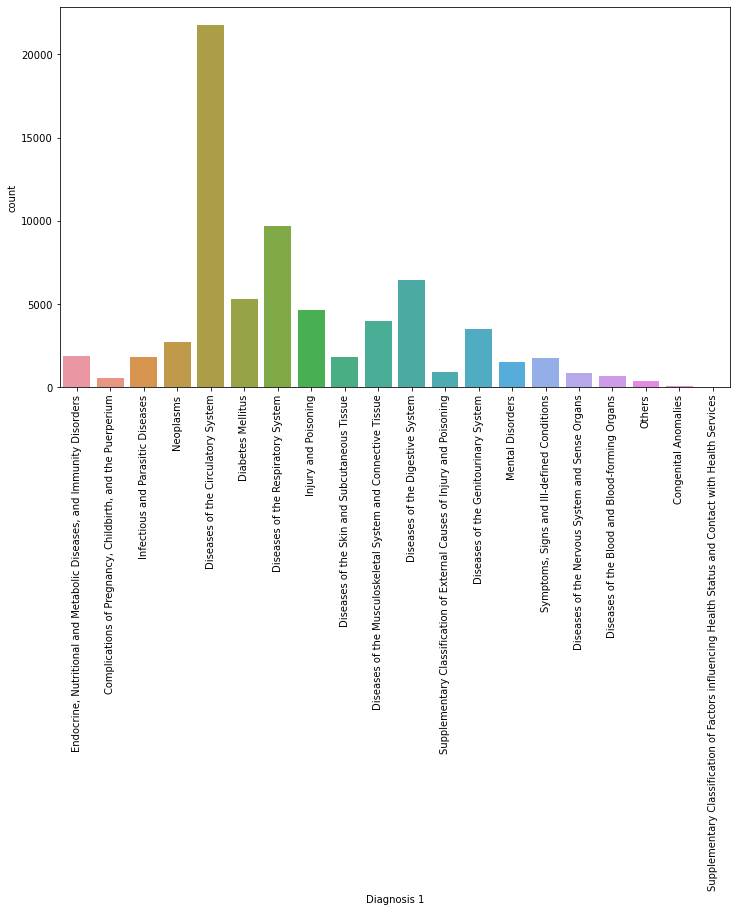

In [58]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['diag_1'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 1')
plt.show()

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


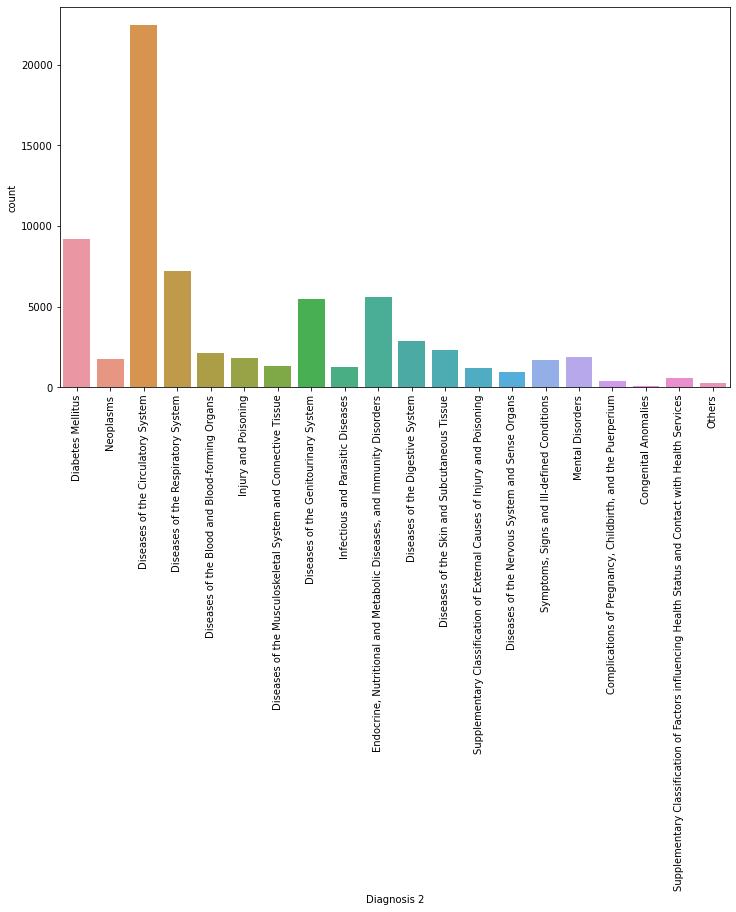

In [59]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['diag_2'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 2')
plt.show()

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


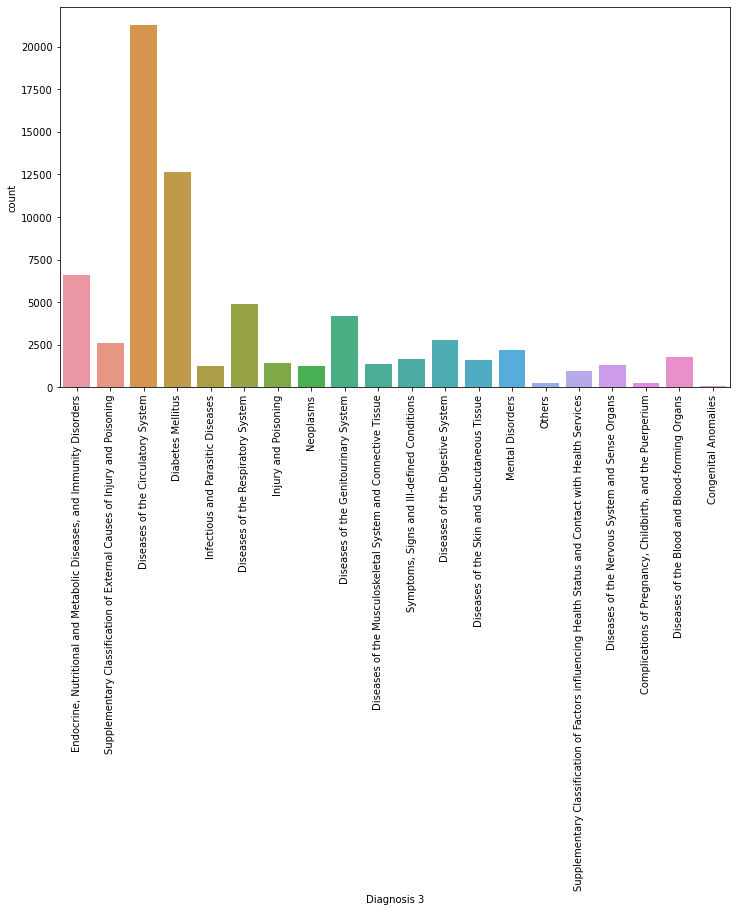

In [60]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['diag_3'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 3')
plt.show()

In [61]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

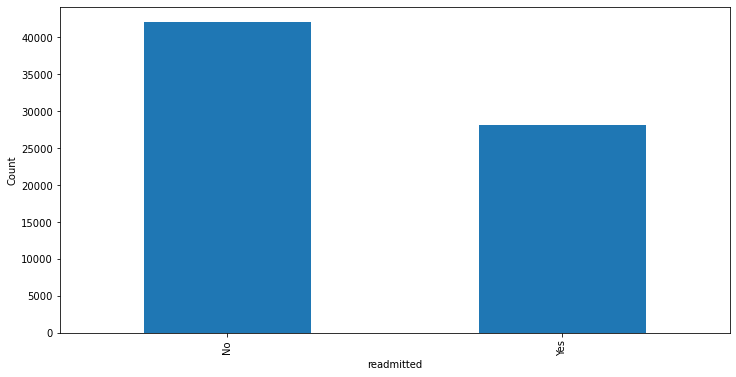

In [62]:
plt.figure(figsize = (12,6))
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [63]:
df['age'].value_counts()

75    18068
65    15797
55    12280
85    11507
45     6685
35     2570
95     1895
25     1021
15      343
5        64
Name: age, dtype: int64

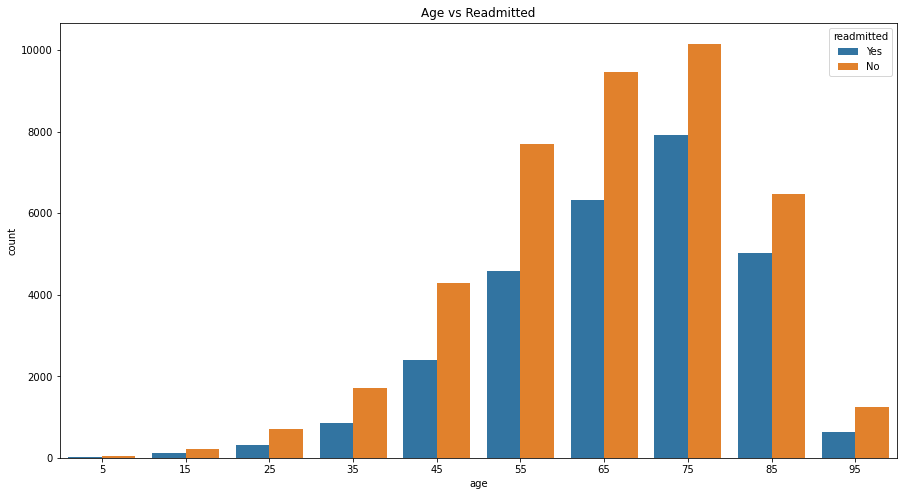

In [64]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x= df['age'], hue = df['readmitted'])
plt.title("Age vs Readmitted")
plt.show()

### admission_type_id

In [65]:
df['admission_type_id'].value_counts()

1    35864
3    13651
2    12787
6     4499
5     3113
8      286
7       21
4        9
Name: admission_type_id, dtype: int64

In [66]:
#df['admission_type_id'] = df['admission_type_id'].map({1: 'Emergency',
#                                                      2: 'Urgent',
#                                                      3: 'Elective',
#                                                      4: 'Newborn',
#                                                      5: 'Not Available',
 #                                                     6: 'NULL',
  #                                                    7: 'Trauma Center',
   #                                                   8: 'Not Mapped'
    #                                                  })

In [67]:
#df['admission_type_id'].value_counts()

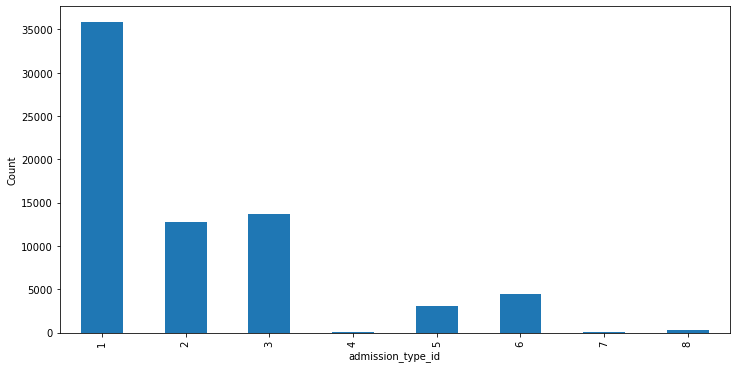

In [68]:
plt.figure(figsize = (12,6))
df.groupby('admission_type_id').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

### admission_source_id

In [69]:
df['admission_source_id'].value_counts()

7     37719
1     21556
17     4861
4      2545
6      1690
2       918
5       542
20      155
3       131
9        85
8        11
10        7
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64

admission_source = {1:"Physician Referral",
                   2:"Clinic Referral",
                    3:"HMO Referral",
                   5:"Transfer from a Skilled Nursing Facility (SNF)",
                    6:"Transfer from another health care facility",
                    7:"Emergency Room",
                    8:"Court/Law Enforcement",
                    9:"Not Available",
                    10:"Transfer from critial access hospital",
                    11:"Normal Delivery",
                    12:"Premature Delivery",
                    13:"Sick Baby",
                    14:"Extramural Birth",
                    15:"Not Available",
                    17:"NULL",
                    18:"Transfer From Another Home Health Agency",
                    19:"Readmission to Same Home Health Agency",
                    20:"Not Mapped",
                    21:"Unknown/Invalid",
                    22:"Transfer from hospital inpt/same fac reslt in a sep claim",
                    23:"Born inside this hospital",
                    24:"Born outside this hospital",
                    25:"Transfer from Ambulatory Surgery Center",
                    26:"Transfer from Hospice"
                    }

In [70]:
#df = df.replace({"admission_source_id":admission_source})

In [71]:
#df['admission_source_id'].value_counts()

In [72]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes


In [73]:
df["diabetesMed"].value_counts()

Yes    53305
No     16925
Name: diabetesMed, dtype: int64

In [74]:
df["insulin"].value_counts()

Yes    35820
No     34410
Name: insulin, dtype: int64

In [75]:
df_meds = df[['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]
df_meds.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [76]:
cols = df_meds.columns
for col in cols:
    print(df[col].value_counts())

No        55492
Steady    13495
Up          818
Down        425
Name: metformin, dtype: int64
No        69310
Steady      820
Up           71
Down         29
Name: repaglinide, dtype: int64
No        69736
Steady      470
Up           16
Down          8
Name: nateglinide, dtype: int64
No        70160
Steady       65
Up            4
Down          1
Name: chlorpropamide, dtype: int64
No        66526
Steady     3336
Up          231
Down        137
Name: glimepiride, dtype: int64
No        70229
Steady        1
Name: acetohexamide, dtype: int64
No        61227
Steady     8051
Up          576
Down        376
Name: glipizide, dtype: int64
No        62490
Steady     6709
Up          618
Down        413
Name: glyburide, dtype: int64
No        70211
Steady       19
Name: tolbutamide, dtype: int64
No        64990
Steady     4983
Up          177
Down         80
Name: pioglitazone, dtype: int64
No        65584
Steady     4436
Up          135
Down         75
Name: rosiglitazone, dtype: int64
No    

In [77]:
#examide and citoglipton columns are all no, hence we can drop them as they will not help in further analysis

In [78]:
df.drop(["examide", "citoglipton"], axis=1, inplace=True)

In [79]:
#Updating the columns with medical prescription to yes and no classes, for easier understanding

In [80]:
df["metformin"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [81]:
df["repaglinide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [82]:
df["nateglinide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [83]:
df["chlorpropamide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [84]:
df["glimepiride"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [85]:
df["acetohexamide"].replace('Steady', "Yes", inplace = True)

In [86]:
df["glipizide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [87]:
df["glyburide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [88]:
df["tolbutamide"].replace(['Steady'], "Yes", inplace = True)

In [89]:
df["pioglitazone"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [90]:
df["rosiglitazone"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [91]:
df["acarbose"].replace(['Steady','Up'], "Yes", inplace = True)

In [92]:
df["miglitol"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [93]:
df["troglitazone"].replace(['Steady'], "Yes", inplace = True)

In [94]:
df["tolazamide"].replace(['Steady'], "Yes", inplace = True)

In [95]:
df["glyburide-metformin"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [96]:
df["glipizide-metformin"].replace(['Steady'], "Yes", inplace = True)

In [97]:
df["glimepiride-pioglitazone"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [98]:
df["metformin-rosiglitazone"].replace(['Steady'], "Yes", inplace = True)

In [99]:
df["metformin-pioglitazone"].replace(['Steady'], "Yes", inplace = True)

In [100]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes


In [101]:
df_meds = df[['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]
df_meds.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [102]:
df_meds.shape

(70230, 20)

In [103]:
cols = df_meds.columns
for col in cols:
    df_meds[col].replace(["No", "Yes"], [0,1], inplace=True)

C:\Users\vaish\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [104]:
df_meds.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
#Checking if atleast one medicine is prescribed, sum>0 implies one or combination of medicines were prescribed

In [106]:
med_yes_no = df_meds.sum(axis = 1, skipna = True)
med_yes_no.value_counts()

0    36412
1    22323
2     9566
3     1849
4       75
5        4
6        1
dtype: int64

In [107]:
len(med_yes_no)

70230

In [108]:
df.shape

(70230, 45)

In [109]:
med_given=[]

for i in med_yes_no:
    if i > 0:
        med_given.append(1)
    else:
        med_given.append(0)

#### Creating a new columns other_drugs and appending it to the dataframe, which tells if atleast one of the 20 (2 drugs were already dropped) drugs were prescribed or not

In [110]:
df["other_drugs"] = med_given

In [111]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,0


In [112]:
df["insulin"].replace(["No", "Yes"], [0,1], inplace=True )

In [113]:
df[["insulin", "other_drugs"]]

,insulin,other_drugs
1,1,0
2,0,1
3,1,0
4,1,1
5,1,0
...,...,...
71513,1,1
71514,1,1
71515,1,0
71516,1,0


In [114]:
df["other_drugs"].value_counts()

0    36412
1    33818
Name: other_drugs, dtype: int64

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='other_drugs', ylabel='count'>

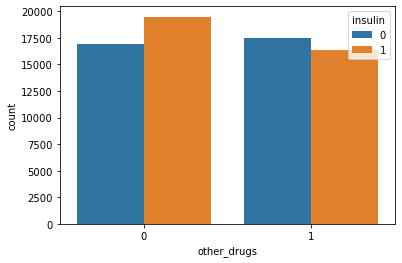

In [115]:
sns.countplot(df["other_drugs"], hue =df["insulin"])

In [116]:
#Apprx. 17000 patients were not given any medication (0 for drug_prescribed, 0 for insulin)

In [117]:
#We can drop the 20 drug columns as we have simplified them with one column

In [118]:
df.drop(['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1, inplace=True)

In [119]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [120]:
df.shape

(70230, 26)

In [121]:
#df["insulin"] = df["insulin"].astype("object")

In [122]:
#df["other_drugs"] = df["other_drugs"].astype("object")
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
insulin                      int64
change                      object
diabetesMed                 object
readmitted                  object
other_drugs                  int64
dtype: object

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


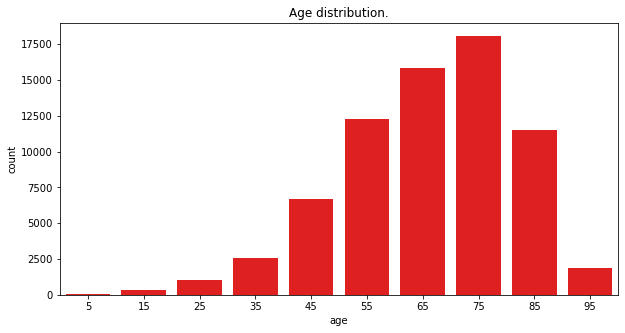

In [123]:

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['age'], color = 'RED', ax=ax)
plt.title('Age distribution.')
plt.show()

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


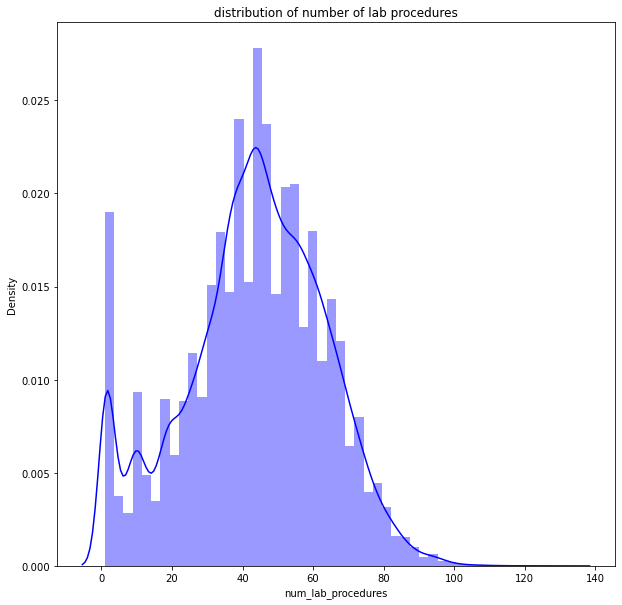

In [124]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['num_lab_procedures'], color = 'Blue', ax=ax)
plt.title('distribution of number of lab procedures')
plt.show()

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


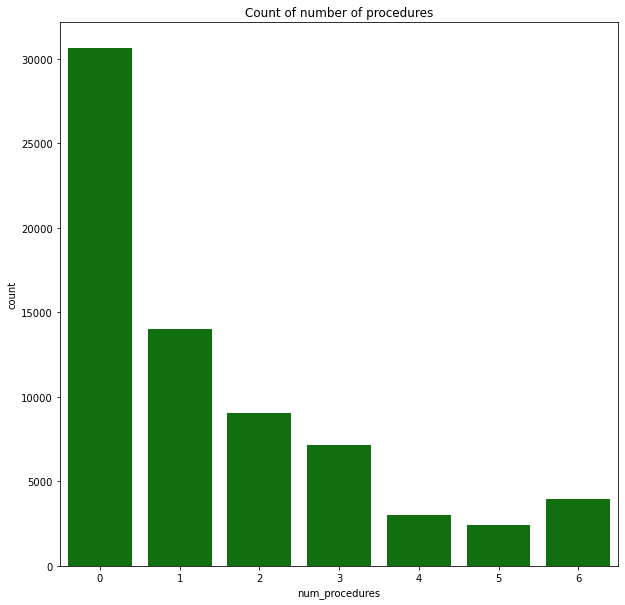

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(df['num_procedures'], color = 'Green', ax=ax)
plt.title('Count of number of procedures')
plt.show()

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


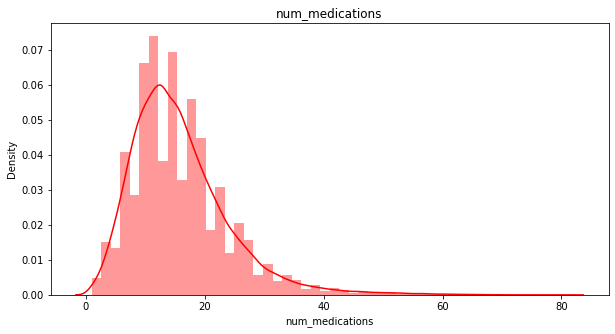

In [126]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['num_medications'], color = 'RED', ax=ax)
plt.title('num_medications')
plt.show()

In [127]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [128]:
#Excluding data where no medication is given i.e no insulin and no other drugs

In [129]:
df_meds_yes = df[df["diabetesMed"] != "No"]
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [130]:
df_meds_yes.shape

(53305, 26)

Using the treatment columns i.e insulin and other drugs and preparing a target column which comprises of 3 classes
1. only other drugs
2. only insulin
3. combination of insulin and other drugs

In [131]:
df_only_meds = df_meds_yes[["insulin", "other_drugs"]]
df_only_meds.head()

,insulin,other_drugs
1,1,0
2,0,1
3,1,0
4,1,1
5,1,0


In [132]:
#To seggregate the classes, using sum method along axis 1. Hence replacing 0,1 with different integers
#For other drugs 0,1 is replaced with 1,2
#For insulin 0,1 is replaced with 3,5 
#Now if the sum is 5, it means only other drugs
#Now if the sum is 6, it means only insulin
#Now if the sum is 7, it means both insulin and other drugs

In [133]:
df_only_meds["insulin"].replace([0,1], [3,5], inplace=True)
df_only_meds["other_drugs"].replace([0,1], [1,2], inplace=True)
df_only_meds.head()

C:\Users\vaish\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,insulin,other_drugs
1,5,1
2,3,2
3,5,1
4,5,2
5,5,1


In [134]:
med_sum = df_only_meds.sum(axis = 1)
med_sum.value_counts()

6    19487
5    17485
7    16333
dtype: int64

In [135]:
#Appending other drugs, insulin, combination in list to add to the dataframe
treatment=[]

for i in med_sum:
    if i == 5:
        treatment.append("other_drugs")
    elif i == 6:
        treatment.append("insulin")
    else:
        treatment.append("combination")

In [136]:
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [137]:
df_meds_yes["treatment_type"] = treatment
df_meds_yes.head()

<ipython-input-137-7512a828657b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meds_yes["treatment_type"] = treatment


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs,treatment_type
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0,insulin
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1,other_drugs
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0,insulin
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1,combination
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0,insulin


In [138]:
#Now that we have the target column by combining insulin and other_drugs columns, we can drop them

In [139]:
df_meds_yes.drop(["insulin", "other_drugs"], axis=1, inplace=True)
df_meds_yes.head()

C:\Users\vaish\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment_type
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,Ch,Yes,Yes,insulin
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,Yes,No,other_drugs
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,Ch,Yes,No,insulin
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,Ch,Yes,No,combination
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,Yes,Yes,insulin


In [140]:
df_meds_yes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
treatment_type              object
dtype: object

In [141]:
#Since we have dropped all the rows with diabetesmeds = No, we can drop the column diabetesMed as it is only yes

In [142]:
df_meds_yes['diabetesMed'].value_counts()

Yes    53305
Name: diabetesMed, dtype: int64

In [143]:
import warnings
warnings.filterwarnings("ignore")
df_meds_yes.drop("diabetesMed", axis=1, inplace=True)

### Label Encoding

In [144]:
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,treatment_type
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,Ch,Yes,insulin
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,other_drugs
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,Ch,No,insulin
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,Ch,No,combination
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,Yes,insulin


In [145]:
#columns - race, gender, max_glu_serum, A1Cresult, change, readmitted and treatment_type can be given labels
#Structure for labelling
#No --> 0
#Yes --> 1
#Female --> 0
#Male --> 1
#Other categories will be labelled in alphabetical order

In [146]:
df_meds_yes["treatment_type"].value_counts()

insulin        19487
other_drugs    17485
combination    16333
Name: treatment_type, dtype: int64

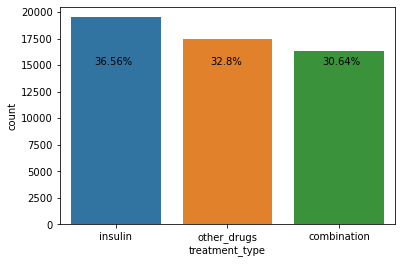

In [147]:
p_of_insulin = str(round((df_meds_yes["treatment_type"].value_counts()[0]/len(df_meds_yes))*100,2))+"%"
p_of_other = str(round((df_meds_yes["treatment_type"].value_counts()[1]/len(df_meds_yes))*100,2))+"%"
p_of_comb = str(round((df_meds_yes["treatment_type"].value_counts()[2]/len(df_meds_yes))*100,2))+"%"

sns.countplot(df_meds_yes["treatment_type"])
plt.text(x=-0.19, y= 15000, s=p_of_insulin)
plt.text(x=0.85, y=15000, s=p_of_other)
plt.text(x=1.85, y=15000, s=p_of_comb)
plt.show()

In [148]:
#Target column is balanced

In [149]:
df_meds_yes.shape

(53305, 24)

In [150]:
df_meds_yes["gender"].replace(["Female", "Male"], [0,1], inplace=True)

In [151]:
df_meds_yes["max_glu_serum"].value_counts()

None    50890
Norm     1049
>200      748
>300      618
Name: max_glu_serum, dtype: int64

In [152]:
#Replacing max_glu_serum with none-0, norm-1, >200-2 & >300-3
df_meds_yes["max_glu_serum"].replace(["None", "Norm", ">200", ">300"], [0,1,2,3], inplace=True)

In [153]:
df_meds_yes["A1Cresult"].value_counts()

None    42896
>8       5403
Norm     2730
>7       2276
Name: A1Cresult, dtype: int64

In [154]:
#Replacing A1Cresult with 0, Norm = 5, 7,8 as normal sugar level ranges from 5-6
df_meds_yes["A1Cresult"].replace(["None", "Norm", ">7", ">8"], [0,5,7,8], inplace=True)

In [155]:
df_meds_yes["change"].value_counts()

Ch    31478
No    21827
Name: change, dtype: int64

In [156]:
#Replacing change with No-0, Ch-1
df_meds_yes["change"].replace(["No", "Ch"], [0,1], inplace=True)

In [157]:
df_meds_yes["readmitted"].value_counts()

No     30969
Yes    22336
Name: readmitted, dtype: int64

In [158]:
df_meds_yes["readmitted"].replace(["No", "Yes"], [0,1], inplace=True)

In [159]:
#Converting the target variable treatment_type to only other_drugs-0, only insulin-1, combination-2
df_meds_yes["treatment_type"].replace(["other_drugs", "insulin", "combination"], [0,1,2], inplace=True)

In [160]:
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,treatment_type
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,0,0,1,1,1
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,0,0,0,0,0
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,0,0,1,0,1
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,0,0,1,0,2
5,35754,82637451,Caucasian,1,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,0,0,0,1,1


### One Hot Encoding

In [161]:
df_diag1_dummies = pd.get_dummies(df_meds_yes['diag_1'], drop_first = True, prefix = 'diag_1_')
df_diag2_dummies = pd.get_dummies(df_meds_yes['diag_2'], drop_first = True, prefix = 'diag_2_')
df_diag3_dummies = pd.get_dummies(df_meds_yes['diag_3'], drop_first = True, prefix = 'diag_3_')

In [162]:
df_race_dummies = pd.get_dummies(df_meds_yes['race'], drop_first = True, prefix = 'race_')

In [163]:
df_final = pd.concat([df_meds_yes, df_race_dummies, df_diag1_dummies, df_diag2_dummies, df_diag3_dummies],axis = 1)
df_final.drop(["race", "diag_1", "diag_2", "diag_3"], axis = 1, inplace = True)
df_final.shape

(53305, 81)

### Dividing into Independent and Dependent variables


In [164]:
#Dropping encounter_id and patient_nbr from X as they are just ids
X = df_final.drop(['treatment_type','encounter_id','patient_nbr'], axis = 1)
y = df_final['treatment_type']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('X_train size: ', X_train.shape)
print('X_test size:  ', X_test.shape)
print('y_train size:  ', y_train.shape)
print('y_test size:   ', y_test.shape)

X_train size:  (37313, 78)
X_test size:   (15992, 78)
y_train size:   (37313,)
y_test size:    (15992,)


# Base Model

## Assumptions test for the classification problem:

#### In the base model we have used Logistic Regression, Decision tree, Random forest, KNN, Naive Bayes algorithms. We will test the assumptions for all the algorithms. 

### Logistic Regression assumption test:

#### Normality of residuals

In [166]:
import scipy.stats as stats

In [167]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
lr=LogisticRegression()
lr_model=lr.fit(X_train, y_train)

y_pred_lr=lr_model.predict(X_test)
residual=y_test-y_pred_lr

#Test of normality:
stats.shapiro(residual)

ShapiroResult(statistic=0.8576174974441528, pvalue=0.0)

In [168]:
#Pval < 0.05
#Ho rejected 
#Residuals are not normally distributed. So the assumptions of Logistic regression satisfied.

#### Test of MultiCollinearity:

<AxesSubplot:>

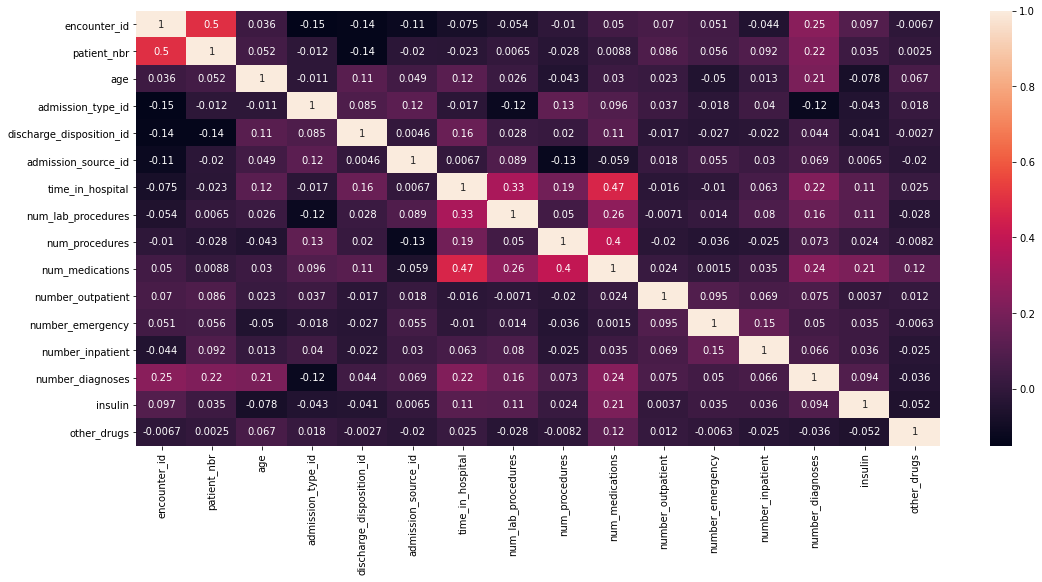

In [169]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

##### From the above plot we can see that none of the feature is included in multicollinearity. So the assumption of multicollinearity is satisfied.

## KNN Assumptions:

##### KNN is a non parametric lazy learning algorithm. When you say a technique is non parametric, it means that it does not make any assumptions on the underlying data distribution

## Decision Tree and Random Forest Assumptions

##### In decision tree and Random Forest as we have no probabilistic model, but just binary split, we don't need to make any assumptions at all.

### Logistic Regression Model:

In [170]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
lr=LogisticRegression()
lr_model=lr.fit(X_train, y_train)

y_pred_lr=lr_model.predict(X_test)



#Print Classification report:
print(classification_report(y_test,y_pred_lr))


#Print Accuracy Score for Logistic regression model:
accuracy_lr=accuracy_score(y_test,y_pred_lr)*100
print("Accuracy score for the logistic model is:", accuracy_lr)


#Print F1 score:
f1_score_lr=f1_score(y_test, y_pred_lr, average='weighted')*100
print("F1 score for the model is:", f1_score_lr)

              precision    recall  f1-score   support

           0       0.55      0.41      0.47      5256
           1       0.56      0.40      0.47      5883
           2       0.53      0.85      0.65      4853

    accuracy                           0.54     15992
   macro avg       0.55      0.56      0.53     15992
weighted avg       0.55      0.54      0.53     15992

Accuracy score for the logistic model is: 54.208354177088545
F1 score for the model is: 52.50180142958817


In [171]:
confusion_matrix(y_test,y_pred_lr)

array([[2157, 1468, 1631],
       [1472, 2374, 2037],
       [ 315,  400, 4138]], dtype=int64)

In [172]:
from matplotlib.colors import ListedColormap

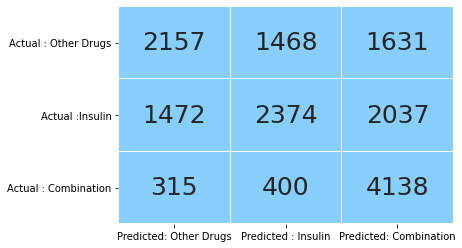

In [173]:
cm = confusion_matrix(y_test, y_pred_lr)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted: Other Drugs','Predicted : Insulin', 'Predicted: Combination'], 
                           index = ['Actual : Other Drugs','Actual :Insulin', 'Actual : Combination'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap=ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


In [174]:
y_predprob = lr_model.predict_proba(X_test)
y_predprob = lr_model.predict_proba(X_test)
y_predprob

array([[0.58528848, 0.37714183, 0.03756969],
       [0.25770481, 0.43211664, 0.31017855],
       [0.18868657, 0.33351388, 0.47779955],
       ...,
       [0.47137616, 0.18273949, 0.34588435],
       [0.24526833, 0.27341104, 0.48132063],
       [0.43511829, 0.49105926, 0.07382244]])

In [175]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

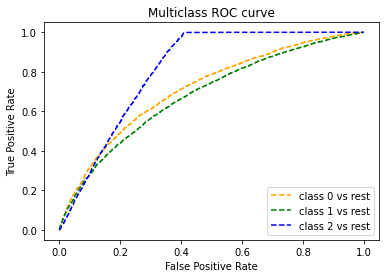

In [176]:
fpr={}
tpr={}
thresh={}

n_class=3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i]=roc_curve(y_test, y_predprob[:,i], pos_label=i)

#Plotting
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='class 0 vs rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='class 1 vs rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='class 2 vs rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')


### Decision Tree model:

In [177]:
# build the model on train data (X_train and y_train)
# use fit() to fit the Decision Tree model
dt = DecisionTreeClassifier()
dt_model=dt.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)



#Print Classification report:
print(classification_report(y_test,y_pred_lr))


#Print accuracy score for Decision Tree model:
accuracy_dt=accuracy_score(y_test, y_pred_dt)*100
print("Accuracy score for the Decision Tree model is:",accuracy_dt)

#Print F1 score:
f1_score_dt=f1_score(y_test, y_pred_dt, average='weighted')*100
print("F1 score for the model is:", f1_score_dt)


              precision    recall  f1-score   support

           0       0.55      0.41      0.47      5256
           1       0.56      0.40      0.47      5883
           2       0.53      0.85      0.65      4853

    accuracy                           0.54     15992
   macro avg       0.55      0.56      0.53     15992
weighted avg       0.55      0.54      0.53     15992

Accuracy score for the Decision Tree model is: 49.074537268634316
F1 score for the model is: 49.0823184021388


### Random Forest Model:

In [178]:
# build the model on train data (X_train and y_train)
# use fit() to fit the Random Forest model

rf = RandomForestClassifier()
rf_model=rf.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

#Print classification report:
print(classification_report(y_test, y_pred_rf))

#Print accuracy score for Decision Tree model:
accuracy_rf=accuracy_score(y_test, y_pred_dt)*100
print("Accuracy score for the Decision Tree model is:",accuracy_rf)


#Print F1 score:
f1_score_rf=f1_score(y_test, y_pred_rf, average='weighted')*100
print("F1 score for the model is:", f1_score_rf)

              precision    recall  f1-score   support

           0       0.61      0.48      0.54      5256
           1       0.62      0.46      0.52      5883
           2       0.55      0.86      0.67      4853

    accuracy                           0.58     15992
   macro avg       0.59      0.60      0.58     15992
weighted avg       0.60      0.58      0.57     15992

Accuracy score for the Decision Tree model is: 49.074537268634316
F1 score for the model is: 57.26038784127244


### KNN Model:

In [179]:
# build the model on train data (X_train and y_train)
# use fit() to fit the KNN model

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)

#Print classification report:
print(classification_report(y_test,y_pred_knn))


#Print Accuracy score:
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
print("Accuracy for the model is:", accuracy_knn)

#Print F1 score:
f1_score_knn=f1_score(y_test, y_pred_knn, average='weighted')*100
print("F1 score for the model is:", f1_score_knn)

              precision    recall  f1-score   support

           0       0.42      0.55      0.47      5256
           1       0.43      0.43      0.43      5883
           2       0.41      0.28      0.33      4853

    accuracy                           0.42     15992
   macro avg       0.42      0.42      0.41     15992
weighted avg       0.42      0.42      0.41     15992

Accuracy for the model is: 42.15232616308154
F1 score for the model is: 41.453816776918075


### Naive-Bayes Model

In [180]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [181]:
# build the model on train data (X_train and y_train)
# use fit() to fit the GaussianNB model

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

#Print classification report:
print(classification_report(y_test, y_pred_gnb))

#Print Accuracy Score:
accuracy_gnb=accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy score for the model is: ",accuracy_gnb)

#Print F1 score:
f1_score_gnb=f1_score(y_test, y_pred_gnb, average='weighted')*100
print("F1 score for the model is:", f1_score_gnb)

              precision    recall  f1-score   support

           0       0.53      0.47      0.50      5256
           1       0.56      0.42      0.48      5883
           2       0.53      0.76      0.63      4853

    accuracy                           0.54     15992
   macro avg       0.54      0.55      0.54     15992
weighted avg       0.54      0.54      0.53     15992

Accuracy score for the model is:  54.07703851925964
F1 score for the model is: 53.13784462804374


In [182]:
# build the model on train data (X_train and y_train)
# use fit() to fit the MultinomialNB model

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

#Print classifictaion report:
print(classification_report(y_test, y_pred_mnb))

#Print Accuracy score:
accuracy_mnb=accuracy_score(y_test, y_pred_mnb)*100
print("Accuracy score for the model is:",accuracy_mnb)


#Print F1 score:
f1_score_mnb=f1_score(y_test, y_pred_mnb, average='weighted')*100
print("F1 score for the model is:", f1_score_mnb)

              precision    recall  f1-score   support

           0       0.42      0.56      0.48      5256
           1       0.46      0.42      0.44      5883
           2       0.50      0.37      0.43      4853

    accuracy                           0.45     15992
   macro avg       0.46      0.45      0.45     15992
weighted avg       0.46      0.45      0.45     15992

Accuracy score for the model is: 45.310155077538774
F1 score for the model is: 45.0325546379557


In [183]:
# build the model on train data (X_train and y_train)
# use fit() to fit the GaussianNB model

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

#Print classification report:
report=classification_report(y_test, y_pred_bnb)

print(classification_report(y_test, y_pred_bnb))

#Print Accuracy Score:
accuracy_bnb=accuracy_score(y_test, y_pred_bnb)*100
print("Accuracy score for the model is: ", accuracy_bnb)

#Print F1 score:
f1_score_bnb=f1_score(y_test, y_pred_bnb, average='weighted')*100
print("F1 score for the model is:", f1_score_bnb)

              precision    recall  f1-score   support

           0       0.58      0.42      0.49      5256
           1       0.57      0.37      0.44      5883
           2       0.53      0.91      0.67      4853

    accuracy                           0.55     15992
   macro avg       0.56      0.56      0.53     15992
weighted avg       0.56      0.55      0.52     15992

Accuracy score for the model is:  54.72736368184093
F1 score for the model is: 52.47522471408242


### Store accuracy score and F1 score in dataframe

In [184]:
data={'Accuracy_Score' : [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_mnb, accuracy_bnb, accuracy_gnb],
     'F1_Score': [f1_score_lr, f1_score_dt, f1_score_rf, f1_score_knn, f1_score_mnb, f1_score_bnb, f1_score_gnb]}

In [185]:
df=pd.DataFrame(data, index=['Logistic_Regression', 'Decision_Tree', 'Rndom_Forest', 'KNN', 'MultinomialNB', 'BernoulliNB', 'GaussianNB'])
df

,Accuracy_Score,F1_Score
Logistic_Regression,54.208354,52.501801
Decision_Tree,49.074537,49.082318
Rndom_Forest,49.074537,57.260388
KNN,42.152326,41.453817
MultinomialNB,45.310155,45.032555
BernoulliNB,54.727364,52.475225
GaussianNB,54.077039,53.137845


##### From all the classification algorithms we have applied here we can see that none of the algorithm performed very well on the predicting target variable. So in future we will use hypertuning parameters.

## Future Work

### *RFE *

In [206]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [204]:
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg)
rfe_model = rfe_model.fit(X_train, y_train)
df = pd.DataFrame(data= rfe_model.ranking_, index = X.columns)
col = df[df[0]== 1].index


Index(['change', 'race__Caucasian', 'race__Hispanic',
       'diag_1__Diabetes Mellitus',
       'diag_1__Diseases of the Blood and Blood-forming Organs',
       'diag_1__Diseases of the Circulatory System',
       'diag_1__Diseases of the Digestive System',
       'diag_1__Diseases of the Genitourinary System',
       'diag_1__Diseases of the Musculoskeletal System and Connective Tissue',
       'diag_1__Diseases of the Nervous System and Sense Organs',
       'diag_1__Diseases of the Respiratory System',
       'diag_1__Diseases of the Skin and Subcutaneous Tissue',
       'diag_1__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
       'diag_1__Infectious and Parasitic Diseases',
       'diag_1__Injury and Poisoning', 'diag_1__Mental Disorders',
       'diag_1__Neoplasms', 'diag_1__Others',
       'diag_1__Supplementary Classification of External Causes of Injury and Poisoning',
       'diag_1__Symptoms, Signs and Ill-defined Conditions',
       'diag_2__Diabe

In [214]:
print(X_train_new.shape)
print(y_train.shape)

(37313, 39)
(37313,)


In [222]:
X_train_new

,change,race__Caucasian,race__Hispanic,diag_1__Diabetes Mellitus,diag_1__Diseases of the Blood and Blood-forming Organs,diag_1__Diseases of the Circulatory System,diag_1__Diseases of the Digestive System,diag_1__Diseases of the Genitourinary System,diag_1__Diseases of the Musculoskeletal System and Connective Tissue,diag_1__Diseases of the Nervous System and Sense Organs,diag_1__Diseases of the Respiratory System,diag_1__Diseases of the Skin and Subcutaneous Tissue,"diag_1__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders",diag_1__Infectious and Parasitic Diseases,diag_1__Injury and Poisoning,diag_1__Mental Disorders,diag_1__Neoplasms,diag_1__Others,diag_1__Supplementary Classification of External Causes of Injury and Poisoning,"diag_1__Symptoms, Signs and Ill-defined Conditions",diag_2__Diabetes Mellitus,diag_2__Diseases of the Blood and Blood-forming Organs,diag_2__Diseases of the Circulatory System,diag_2__Diseases of the Digestive System,diag_2__Diseases of the Genitourinary System,diag_2__Diseases of the Musculoskeletal System and Connective Tissue,diag_2__Diseases of the Nervous System and Sense Organs,diag_2__Diseases of the Respiratory System,diag_2__Diseases of the Skin and Subcutaneous Tissue,"diag_2__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders",diag_2__Infectious and Parasitic Diseases,diag_2__Injury and Poisoning,diag_2__Mental Disorders,diag_2__Neoplasms,diag_2__Supplementary Classification of External Causes of Injury and Poisoning,diag_2__Supplementary Classification of Factors influencing Health Status and Contact with Health Services,"diag_2__Symptoms, Signs and Ill-defined Conditions",diag_3__Diseases of the Genitourinary System,diag_3__Supplementary Classification of Factors influencing Health Status and Contact with Health Services
28684,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
46038,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13498,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59814,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30998,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38816,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
67874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40504,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54554,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [229]:
df_data = df_final[['change', 'race__Caucasian', 'race__Hispanic',
       'diag_1__Diabetes Mellitus',
       'diag_1__Diseases of the Blood and Blood-forming Organs',
       'diag_1__Diseases of the Circulatory System',
       'diag_1__Diseases of the Digestive System',
       'diag_1__Diseases of the Genitourinary System',
       'diag_1__Diseases of the Musculoskeletal System and Connective Tissue',
       'diag_1__Diseases of the Nervous System and Sense Organs',
       'diag_1__Diseases of the Respiratory System',
       'diag_1__Diseases of the Skin and Subcutaneous Tissue',
       'diag_1__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
       'diag_1__Infectious and Parasitic Diseases',
       'diag_1__Injury and Poisoning', 'diag_1__Mental Disorders',
       'diag_1__Neoplasms', 'diag_1__Others',
       'diag_1__Supplementary Classification of External Causes of Injury and Poisoning',
       'diag_1__Symptoms, Signs and Ill-defined Conditions',
       'diag_2__Diabetes Mellitus',
       'diag_2__Diseases of the Blood and Blood-forming Organs',
       'diag_2__Diseases of the Circulatory System',
       'diag_2__Diseases of the Digestive System',
       'diag_2__Diseases of the Genitourinary System',
       'diag_2__Diseases of the Musculoskeletal System and Connective Tissue',
       'diag_2__Diseases of the Nervous System and Sense Organs',
       'diag_2__Diseases of the Respiratory System',
       'diag_2__Diseases of the Skin and Subcutaneous Tissue',
       'diag_2__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
       'diag_2__Infectious and Parasitic Diseases',
       'diag_2__Injury and Poisoning', 'diag_2__Mental Disorders',
       'diag_2__Neoplasms',
       'diag_2__Supplementary Classification of External Causes of Injury and Poisoning',
       'diag_2__Supplementary Classification of Factors influencing Health Status and Contact with Health Services',
       'diag_2__Symptoms, Signs and Ill-defined Conditions',
       'diag_3__Diseases of the Genitourinary System',
       'diag_3__Supplementary Classification of Factors influencing Health Status and Contact with Health Services']]

In [230]:
df_project = pd.concat([df_data, df_final['treatment_type']], 1)

In [231]:
df_project.reset_index(drop=True)

,change,race__Caucasian,race__Hispanic,diag_1__Diabetes Mellitus,diag_1__Diseases of the Blood and Blood-forming Organs,diag_1__Diseases of the Circulatory System,diag_1__Diseases of the Digestive System,diag_1__Diseases of the Genitourinary System,diag_1__Diseases of the Musculoskeletal System and Connective Tissue,diag_1__Diseases of the Nervous System and Sense Organs,diag_1__Diseases of the Respiratory System,diag_1__Diseases of the Skin and Subcutaneous Tissue,"diag_1__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders",diag_1__Infectious and Parasitic Diseases,diag_1__Injury and Poisoning,diag_1__Mental Disorders,diag_1__Neoplasms,diag_1__Others,diag_1__Supplementary Classification of External Causes of Injury and Poisoning,"diag_1__Symptoms, Signs and Ill-defined Conditions",diag_2__Diabetes Mellitus,diag_2__Diseases of the Blood and Blood-forming Organs,diag_2__Diseases of the Circulatory System,diag_2__Diseases of the Digestive System,diag_2__Diseases of the Genitourinary System,diag_2__Diseases of the Musculoskeletal System and Connective Tissue,diag_2__Diseases of the Nervous System and Sense Organs,diag_2__Diseases of the Respiratory System,diag_2__Diseases of the Skin and Subcutaneous Tissue,"diag_2__Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders",diag_2__Infectious and Parasitic Diseases,diag_2__Injury and Poisoning,diag_2__Mental Disorders,diag_2__Neoplasms,diag_2__Supplementary Classification of External Causes of Injury and Poisoning,diag_2__Supplementary Classification of Factors influencing Health Status and Contact with Health Services,"diag_2__Symptoms, Signs and Ill-defined Conditions",diag_3__Diseases of the Genitourinary System,diag_3__Supplementary Classification of Factors influencing Health Status and Contact with Health Services,treatment_type
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53300,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
53301,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
53302,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
53303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [234]:
X1 = df_project.drop('treatment_type',axis=1)
y1 = df_project['treatment_type']

In [235]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2, random_state=101)

In [236]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(42644, 39)
(10661, 39)
(42644,)
(10661,)


In [ ]:
#Build logistic Regression post RFE

In [239]:
lr1=LogisticRegression()
lr_model1=lr1.fit(X_train1, y_train1)

y_pred_lr1=lr_model1.predict(X_test1)



#Print Classification report:
print(classification_report(y_test1,y_pred_lr1))


#Print Accuracy Score for Logistic regression model:
accuracy_lr1=accuracy_score(y_test1,y_pred_lr1)*100
print("Accuracy score for the logistic model is:", accuracy_lr)


#Print F1 score:
f1_score_lr1=f1_score(y_test1, y_pred_lr1, average='weighted')*100
print("F1 score for the model is:", f1_score_lr1)

              precision    recall  f1-score   support

           0       0.56      0.41      0.47      3449
           1       0.61      0.35      0.45      3968
           2       0.52      0.95      0.67      3244

    accuracy                           0.55     10661
   macro avg       0.56      0.57      0.53     10661
weighted avg       0.57      0.55      0.52     10661

Accuracy score for the logistic model is: 54.208354177088545
F1 score for the model is: 52.37410021600167


In [240]:
confusion_matrix(y_test1,y_pred_lr1)

array([[1397,  745, 1307],
       [1067, 1400, 1501],
       [  19,  151, 3074]], dtype=int64)

In [ ]:
#Decision Tree:

In [241]:
# build the model on train data (X_train and y_train)
# use fit() to fit the Decision Tree model
dt1 = DecisionTreeClassifier()
dt_model1=dt1.fit(X_train1,y_train1)

y_pred_dt1 = dt_model1.predict(X_test1)



#Print Classification report:
print(classification_report(y_test1,y_pred_lr1))


#Print accuracy score for Decision Tree model:
accuracy_dt1=accuracy_score(y_test1, y_pred_dt1)*100
print("Accuracy score for the Decision Tree model is:",accuracy_dt1)

#Print F1 score:
f1_score_dt1=f1_score(y_test1, y_pred_dt1, average='weighted')*100
print("F1 score for the model is:", f1_score_dt1)

              precision    recall  f1-score   support

           0       0.56      0.41      0.47      3449
           1       0.61      0.35      0.45      3968
           2       0.52      0.95      0.67      3244

    accuracy                           0.55     10661
   macro avg       0.56      0.57      0.53     10661
weighted avg       0.57      0.55      0.52     10661

Accuracy score for the Decision Tree model is: 53.73792327173811
F1 score for the model is: 51.582469609914014


In [ ]:
# KNN

In [242]:
# build the model on train data (X_train and y_train)
# use fit() to fit the KNN model

knn1=KNeighborsClassifier()
knn_model1=knn1.fit(X_train1,y_train1)

y_pred_knn1 = knn_model1.predict(X_test1)

#Print classification report:
print(classification_report(y_test1,y_pred_knn1))


#Print Accuracy score:
accuracy_knn1=accuracy_score(y_test1,y_pred_knn1)*100
print("Accuracy for the model is:", accuracy_knn1)

#Print F1 score:
f1_score_knn1=f1_score(y_test1, y_pred_knn1, average='weighted')*100
print("F1 score for the model is:", f1_score_knn1)

              precision    recall  f1-score   support

           0       0.47      0.50      0.48      3449
           1       0.49      0.37      0.42      3968
           2       0.52      0.65      0.58      3244

    accuracy                           0.50     10661
   macro avg       0.50      0.51      0.49     10661
weighted avg       0.49      0.50      0.49     10661

Accuracy for the model is: 49.62011068380077
F1 score for the model is: 48.97038460996968


In [ ]:
# Random Forest


In [245]:
rf1 = RandomForestClassifier()
rf_model1=rf.fit(X_train1, y_train1)

y_pred_rf1 = rf_model1.predict(X_test1)

#Print classification report:
print(classification_report(y_test1, y_pred_rf1))

#Print accuracy score for Random forest model:
accuracy_rf1=accuracy_score(y_test1, y_pred_rf1)*100
print("Accuracy score for the Random forest model is:",accuracy_rf1)


#Print F1 score:
f1_score_rf1=f1_score(y_test1, y_pred_rf1, average='weighted')*100
print("F1 score for the model is:", f1_score_rf1)

              precision    recall  f1-score   support

           0       0.54      0.43      0.48      3449
           1       0.58      0.35      0.43      3968
           2       0.52      0.89      0.66      3244

    accuracy                           0.54     10661
   macro avg       0.55      0.56      0.53     10661
weighted avg       0.55      0.54      0.52     10661

Accuracy score for the Random forest model is: 54.08498264703123
F1 score for the model is: 51.806636897348255


In [ ]:
# Naive Bayes


In [247]:
# Gaussian NB

# build the model on train data (X_train and y_train)
# use fit() to fit the GaussianNB model

gnb1 = GaussianNB()
gnb1.fit(X_train1,y_train1)
y_pred_gnb1 = gnb1.predict(X_test1)

#Print classification report:
print(classification_report(y_test1, y_pred_gnb1))

#Print Accuracy Score:
accuracy_gnb1=accuracy_score(y_test1, y_pred_gnb1)*100
print("Accuracy score for the model is: ",accuracy_gnb1)

#Print F1 score:
f1_score_gnb1=f1_score(y_test1, y_pred_gnb1, average='weighted')*100
print("F1 score for the model is:", f1_score_gnb1)

              precision    recall  f1-score   support

           0       0.54      0.32      0.40      3449
           1       0.57      0.38      0.45      3968
           2       0.52      0.95      0.67      3244

    accuracy                           0.53     10661
   macro avg       0.54      0.55      0.51     10661
weighted avg       0.54      0.53      0.50     10661

Accuracy score for the model is:  53.48466372760529
F1 score for the model is: 50.34789344226335


In [ ]:
# Multinomial NB


In [249]:
# build the model on train data (X_train and y_train)
# use fit() to fit the MultinomialNB model

mnb1 = MultinomialNB()
mnb1.fit(X_train1,y_train1)
y_pred_mnb1 = mnb1.predict(X_test1)

#Print classifictaion report:
print(classification_report(y_test1, y_pred_mnb1))

#Print Accuracy score:
accuracy_mnb1=accuracy_score(y_test1, y_pred_mnb1)*100
print("Accuracy score for the model is:",accuracy_mnb1)


#Print F1 score:
f1_score_mnb1=f1_score(y_test1, y_pred_mnb1, average='weighted')*100
print("F1 score for the model is:", f1_score_mnb1)

              precision    recall  f1-score   support

           0       0.46      0.54      0.49      3449
           1       0.48      0.49      0.49      3968
           2       0.53      0.41      0.47      3244

    accuracy                           0.48     10661
   macro avg       0.49      0.48      0.48     10661
weighted avg       0.49      0.48      0.48     10661

Accuracy score for the model is: 48.447612794296965
F1 score for the model is: 48.35482794631396


In [252]:
bnb1 = BernoulliNB()
bnb1.fit(X_train1,y_train1)
y_pred_bnb1 = bnb1.predict(X_test1)

#Print classification report:
report1=classification_report(y_test1, y_pred_bnb1)

print(classification_report(y_test1, y_pred_bnb1))

#Print Accuracy Score:
accuracy_bnb1=accuracy_score(y_test1, y_pred_bnb1)*100
print("Accuracy score for the model is: ", accuracy_bnb1)

#Print F1 score:
f1_score_bnb1=f1_score(y_test1, y_pred_bnb1, average='weighted')*100
print("F1 score for the model is:", f1_score_bnb1)

              precision    recall  f1-score   support

           0       0.56      0.42      0.48      3449
           1       0.58      0.34      0.43      3968
           2       0.52      0.92      0.66      3244

    accuracy                           0.54     10661
   macro avg       0.55      0.56      0.52     10661
weighted avg       0.56      0.54      0.52     10661

Accuracy score for the model is:  54.20692242753963
F1 score for the model is: 51.68242017101533


In [254]:
data_rfe={'Accuracy_Score' : [accuracy_lr1, accuracy_dt1, accuracy_rf1, accuracy_knn1, accuracy_mnb1, accuracy_bnb1, accuracy_gnb1],
     'F1_Score': [f1_score_lr1, f1_score_dt1, f1_score_rf1, f1_score_knn1, f1_score_mnb1, f1_score_bnb1, f1_score_gnb1]}

In [255]:
df1=pd.DataFrame(data_rfe, index=['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'KNN', 'MultinomialNB', 'BernoulliNB', 'GaussianNB'])
df1

,Accuracy_Score,F1_Score
Logistic_Regression,55.069881,52.374100
Decision_Tree,53.737923,51.582470
Random_Forest,54.084983,51.806637
KNN,49.620111,48.970385
MultinomialNB,48.447613,48.354828
BernoulliNB,54.206922,51.682420
GaussianNB,53.484664,50.347893
